In [ ]:
# Installing plotly
!pip install plotly_express

In [ ]:
# Importing libraries

import pandas as pd 
import plotly_express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dropping NaN or na values in the dataset.
df = pd.read_csv("Dog_licensing.csv").dropna()


/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_23380/2997513874.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dog_licensing.csv").dropna()


In [ ]:
# EDA: Standard head check to look at the data

df.head()

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,Age
0,PAIGE,F,2014.0,American Pit Bull Mix / Pit Bull Mix,10035.0,09/12/2014,09/12/2017,2016,2.0
1,YOGI,M,2010.0,Boxer,10465.0,09/12/2014,10/02/2017,2016,6.0
2,ALI,M,2014.0,Basenji,10013.0,09/12/2014,09/12/2019,2016,2.0
3,QUEEN,F,2013.0,Akita Crossbreed,10013.0,09/12/2014,09/12/2017,2016,3.0
4,LOLA,F,2009.0,Maltese,10028.0,09/12/2014,10/09/2017,2016,7.0


In [ ]:
# EDA: Standard info check to look at the data
df.info()


In [ ]:
# EDA: Standard describe check to look at the data
df.describe()

In [ ]:
# We changed the Extract Year and AnimalBirthYear columns into numeric values.
df[['Extract Year', 'AnimalBirthYear']] = df[['Extract Year', 'AnimalBirthYear']].apply(pd.to_numeric, errors='coerce')
# Dropped na values (just to be sure)
df = df.dropna(subset=['Extract Year', 'AnimalBirthYear'])
# We created a new column called "Age" by doing Extract Year - AnimalBirthYear
df['Age'] = df['Extract Year'] - df['AnimalBirthYear']
# Setting range to 0 - 30 since that would be a realistic age range, any other data below or above this range is not possible. (Educated guess)
df = df[df['Age'].between(0, 30)]


In [6]:
# EDA: Looking at what kinds of years we have
df["AnimalBirthYear"].unique()

array([2014., 2010., 2013., 2009., 2006., 2008., 2012., 2007., 2005.,
       2011., 2001., 2004., 2003., 2000., 2002., 1991., 1992., 1993.,
       2015., 2016., 1994., 1995., 1996., 1997., 2017., 1998., 1999.,
       2018., 2019., 2020., 2021., 2022., 2023., 2024.])

In [ ]:
# EDA: Looking at what is the minimum year
df["AnimalBirthYear"].min()

np.float64(1991.0)

In [ ]:
# EDA: Standard info check to look at the data
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 720834 entries, 0 to 722863
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AnimalName          720834 non-null  object 
 1   AnimalGender        720834 non-null  object 
 2   AnimalBirthYear     720834 non-null  float64
 3   BreedName           720834 non-null  object 
 4   ZipCode             720834 non-null  float64
 5   LicenseIssuedDate   720834 non-null  object 
 6   LicenseExpiredDate  720834 non-null  object 
 7   Extract Year        720834 non-null  int64  
 8   Age                 720834 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 55.0+ MB


In [ ]:
# EDA: Standard describe check to look at the data
df.describe()

,AnimalBirthYear,ZipCode,Extract Year,Age
count,720834.000000,720834.000000,720834.000000,720834.000000
mean,2014.595969,10705.396075,2020.600181,6.004212
std,5.169445,1066.330846,2.920850,4.419949
min,1991.000000,0.000000,2016.000000,0.000000
25%,2011.000000,10031.000000,2017.000000,2.000000
50%,2015.000000,10469.000000,2022.000000,5.000000
75%,2019.000000,11228.000000,2023.000000,9.000000
max,2024.000000,99508.000000,2024.000000,30.000000


In [ ]:
# EDA: Specifically checking Age describe
age_stats = df['Age'].describe()
print(age_stats)

# Typical stats vets would care about:
print(f"\nMedian age:     {age_stats['50%']:.1f} years")
print(f"IQR (25-75%):   {age_stats['25%']:.0f}–{age_stats['75%']:.0f} years")

count    720834.000000
mean          6.004212
std           4.419949
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          30.000000
Name: Age, dtype: float64

Median age:     5.0 years
IQR (25-75%):   2–9 years


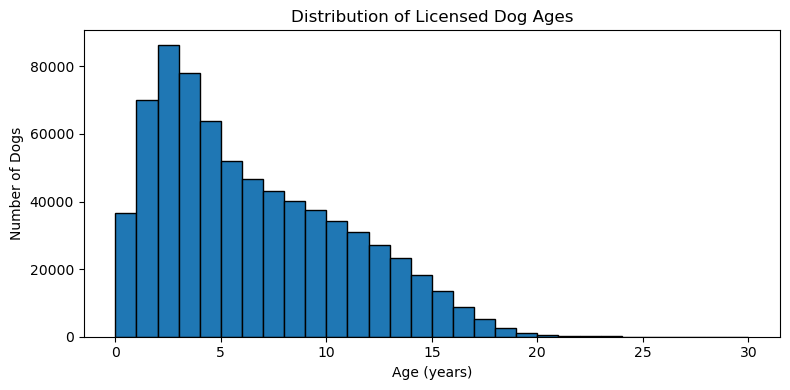

In [ ]:
# 1. Distribution of Licensed Dog Ages
# Visualizing to double check with our Tableau results
plt.figure(figsize=(8,4))
plt.hist(df['Age'], bins=range(0, 31), edgecolor='black', color='#1f77b4')
plt.title('Distribution of Licensed Dog Ages')
plt.xlabel('Age (years)')
plt.ylabel('Number of Dogs')
plt.tight_layout()
plt.show()

In [ ]:
# Checking the average age
average_age = df['Age'].mean()
print(f"Average age of licensed dogs: {average_age:.2f} years")

Average age of licensed dogs: 6.00 years


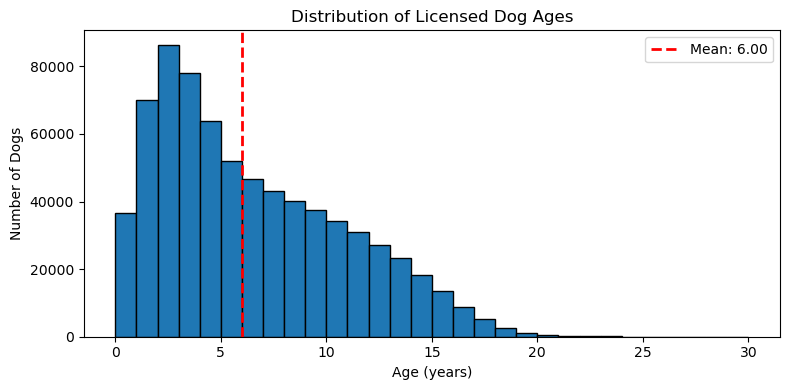

In [ ]:
# 1.2. Distribution of Licensed Dog Ages (Mean)
# We are using this to visually see the mean value
# Also visualizing to double check with our Tableau results

plt.figure(figsize=(8,4))
plt.hist(df['Age'], bins=range(0, 31), edgecolor='black', color='#1f77b4')
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {average_age:.2f}')
plt.title('Distribution of Licensed Dog Ages')
plt.xlabel('Age (years)')
plt.ylabel('Number of Dogs')
plt.legend()
plt.tight_layout()
plt.show()

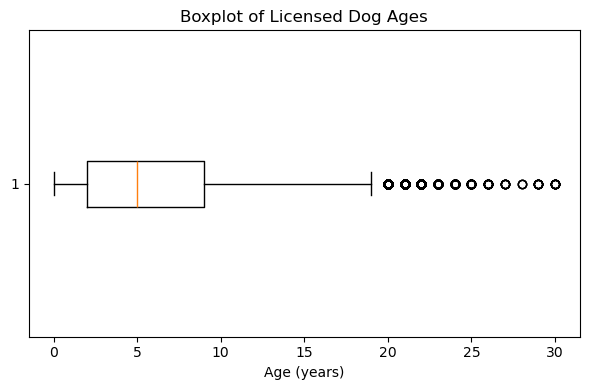

In [ ]:
# 2. Boxplot of Licensed Dog Ages
# Visualizing to double check with our Tableau results

plt.figure(figsize=(6,4))
plt.boxplot(df['Age'], vert=False)
plt.title('Boxplot of Licensed Dog Ages')
plt.xlabel('Age (years)')
plt.tight_layout()
plt.show()

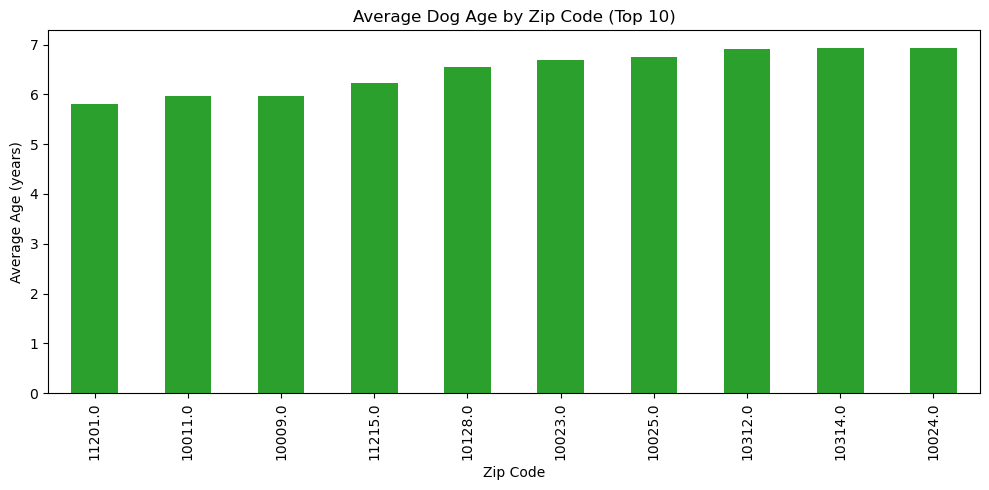

In [ ]:
# 3. Average Age by Zip Code (Top 10 by count)
# Visualizing to double check with our Tableau results

top_zipcodes = df['ZipCode'].value_counts().head(10).index
avg_age_zip = df[df['ZipCode'].isin(top_zipcodes)].groupby('ZipCode')['Age'].mean().sort_values()
plt.figure(figsize=(10,5))
avg_age_zip.plot(kind='bar', color='#2ca02c')
plt.title('Average Dog Age by Zip Code (Top 10)')
plt.xlabel('Zip Code')
plt.ylabel('Average Age (years)')
plt.tight_layout()
plt.show()

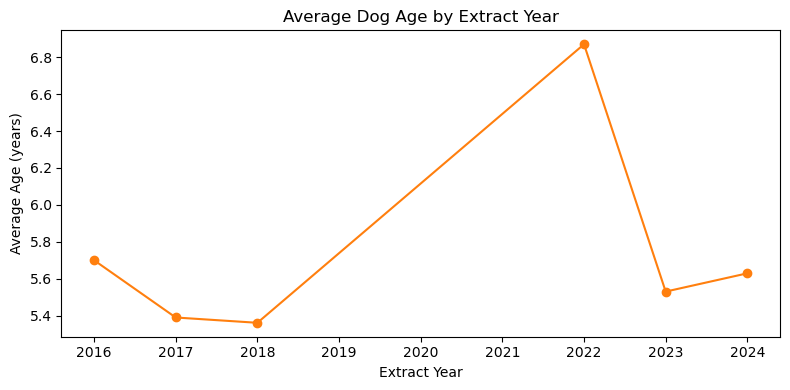

In [ ]:
# 4. Average Age Over Time (by Extract Year)
# Visualizing to double check with our Tableau results
avg_age_year = df.groupby('Extract Year')['Age'].mean()
plt.figure(figsize=(8,4))
avg_age_year.plot(marker='o', color='#ff7f0e')
plt.title('Average Dog Age by Extract Year')
plt.xlabel('Extract Year')
plt.ylabel('Average Age (years)')
plt.tight_layout()
plt.show()

We didn't create the map chart because it was too complicated to do it in Python so that's why it's missing.

In [ ]:
# Double checking to see if our feature engineered column is present (Age)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720834 entries, 0 to 722863
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AnimalName          720834 non-null  object 
 1   AnimalGender        720834 non-null  object 
 2   AnimalBirthYear     720834 non-null  float64
 3   BreedName           720834 non-null  object 
 4   ZipCode             720834 non-null  float64
 5   LicenseIssuedDate   720834 non-null  object 
 6   LicenseExpiredDate  720834 non-null  object 
 7   Extract Year        720834 non-null  int64  
 8   Age                 720834 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 55.0+ MB


In [ ]:
# Export to CSV our cleaned dataset
df.to_csv('final_dataset.csv', index=False)